In [ ]:
Part 4. 시각화 도구
1. Matplotlib - 기본 그래프 도구
2. Seaborn 라이브러리 - 고급 그래프 도구
3. Folium 라이브러리 - 지도 활용
중에서
2. Seaborn 라이브러리 - 고급 그래프 도구 p.82
3. Folium 라이브러리 - 지도 활용

In [1]:
# 예제 4-25 titanic 데이터셋 --- p.82

import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('-'*50)

print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null i

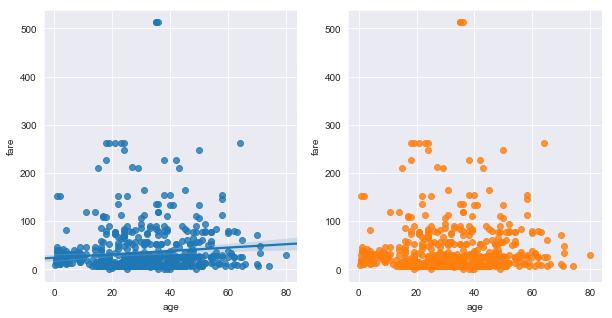

In [4]:
# 예제 4-26 회귀선이 있는 산점도 --- p.82

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age', y='fare', data=titanic, ax=ax1)

sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)

ValueError: could not convert string to float: 'Third'

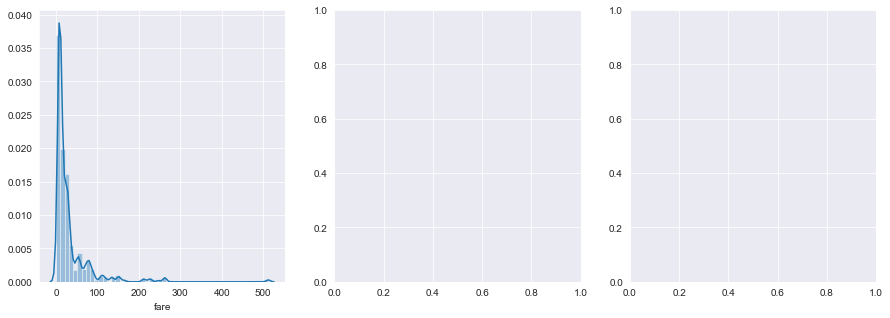

In [9]:
# 예제 4-27 히스토그램/커널밀도함수 --- p. 83

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'], ax=ax1)

sns.kdeplot(x='fare', data=titanic, ax=ax2)
# sns.distplot(titanic['fare'], kde=False, ax=ax2)

sns.histplot(x='fare', data=titanic, ax=ax3)
# sns.distplot(titanic['fare'], hist=False, ax=ax3)

plt.show()

In [26]:
# 예제 4-28 히트맵 --- p.84

import numpy as np

sns.set_style('darkgrid')



print(titanic.head())
print('-'*50)
print(titanic['sex'].value_counts())
print('-'*50)
print(titanic['pclass'].value_counts())
print('-'*50)

#table_sum = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc=np.sum)
#display(table_sum)

table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
display(table)


titanic[titanic['sex'] == 'male']['class'].value_counts()


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--------------------------------------------------
male      577
female    314
Name: sex, dtype: int64
--------------------------------------------------
3    491
1    216
2    184
Name: pclass, dtype: int64
-----------

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


Third     347
First     122
Second    108
Name: class, dtype: int64

In [29]:
#import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter

plt.figure(figsize=(6,4))
sns.heatmap(table, annot=True, fmt='d', cmap='YIGnBu', linewidth=.5, cbar=True)
plt.show()

ValueError: Colormap YIGnBu is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

<Figure size 432x288 with 0 Axes>

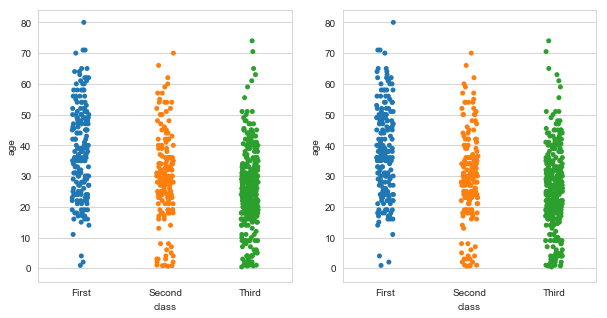

In [30]:
# 예제 4-29 범주형 데이터의 산점도 --- p. 84
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1)
sns.stripplot(x='class', y='age', data=titanic, ax=ax2)
plt.show()

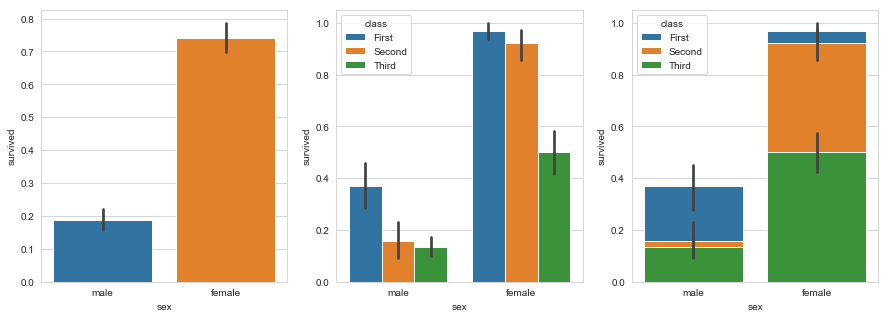

In [33]:
# 예제 4-30 막대그래프 --- p. 85

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', dodge=True, data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

plt.show()

print('검정색 바는 신뢰구간을 나타냄. 바깥부분은 신뢰구간을 벗어남(95%라면 5%에 해당되는 범위)')

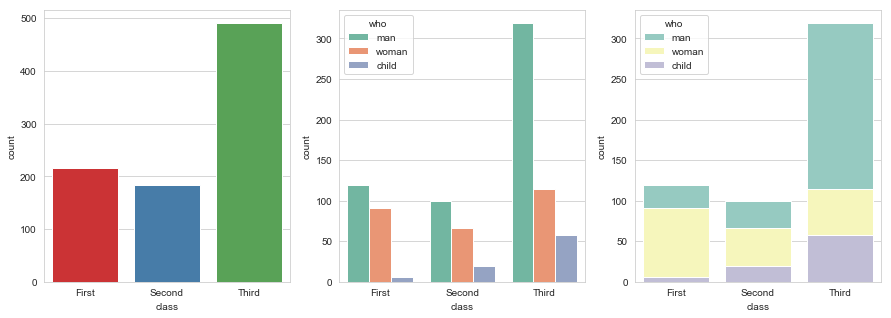

In [34]:
# 예제 4-30 빈도그래프 --- p. 85~86

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', palette='Set2', hue='who', data=titanic, ax=ax2)
sns.countplot(x='class', palette='Set3', hue='who', dodge=False, data=titanic, ax=ax3)

plt.show()

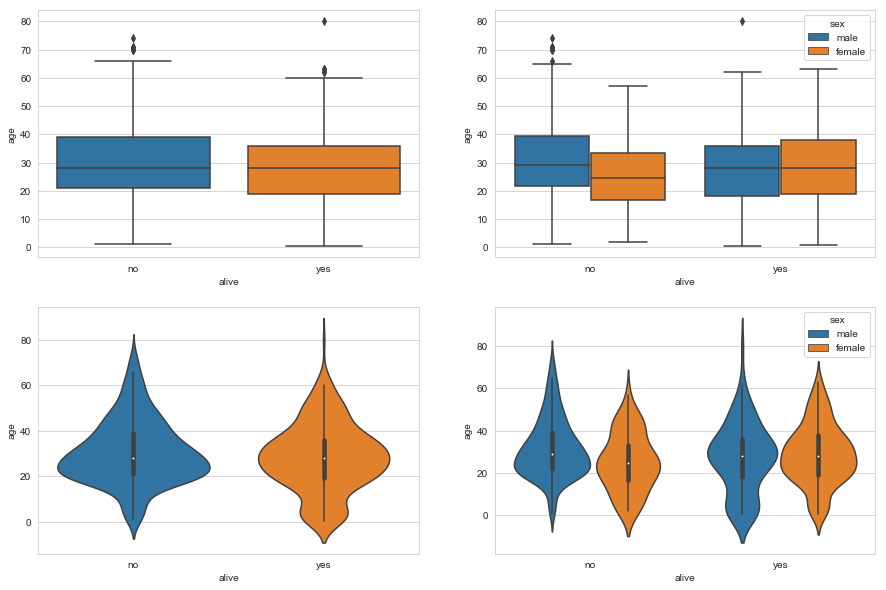

In [40]:
# 예제 4-32 박스 플롯/바이올린 그래프 --- p.86

# 5가지 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

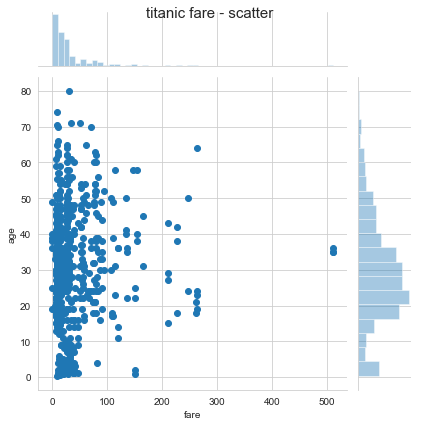

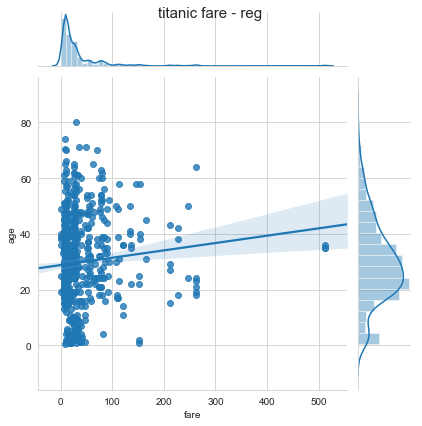

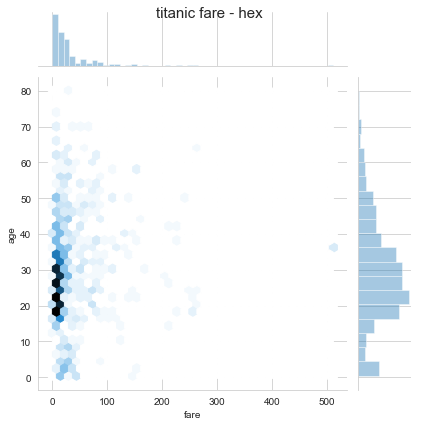

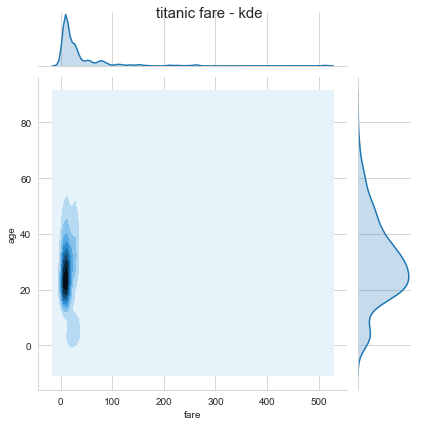

In [42]:
# 예제 4-33 조인트 그래프 --- p.87

sns.set_style('whitegrid')

# 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)
# 회귀선
j2 = sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
# 육각그래프
j3 = sns.jointplot(x='fare', y='age', data=titanic, kind='hex')
# 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', data=titanic, kind='kde')

j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)

plt.show()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--------------------------------------------------
0    549
1    342
Name: survived, dtype: int64
--------------------------------------------------
no     549
yes    342
Name: alive, dtype: int64
----------------------

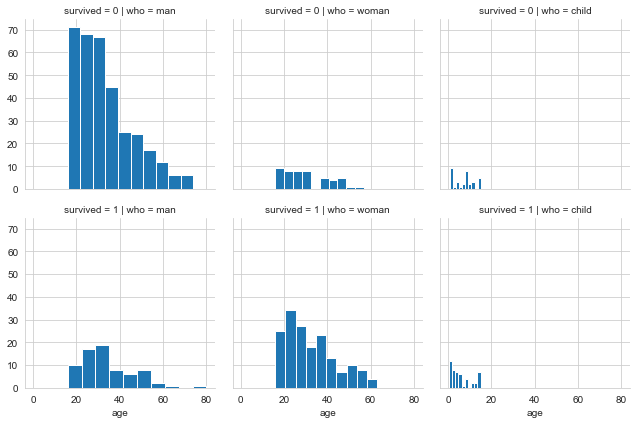

In [49]:
# 예제 4-34 조건에 맞게 화면 분할 --- p.88
print(titanic.head())
print('-'*50)
print(titanic['survived'].value_counts())
print('-'*50)
print(titanic['alive'].value_counts())
print('-'*50)

sns.set_style('whitegrid')

g=sns.FacetGrid(data=titanic, col='who', row='survived')

g=g.map(plt.hist, 'age')

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--------------------------------------------------


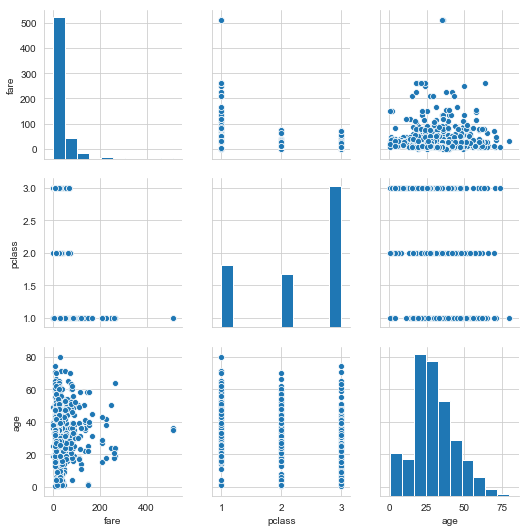

In [57]:
# 예제 4-35 이변수 데이터 분포 --- p.88

print(titanic.head())
print('-'*50)
#print(titanic['fare'].value_counts())
#print('-'*50)
#print(titanic['fare'].unique())
#print('-'*50)

titanic_pair = titanic[{'age', 'pclass', 'fare'}]
g = sns.pairplot(titanic_pair)

In [3]:
# 예제 4-36 지도 만들기 --- p.89

import folium

seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
print(type(seoul_map))
seoul_map.save('./seoul.html')

<class 'folium.folium.Map'>


In [7]:
# 예제 4-37 지도 스타일 적용 --- p.89

seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)

seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', zoom_start=12)

seoul_map4 = folium.Map(location=[37.55,126.98], tiles='Stamen Watercolor', zoom_start=12)

display(seoul_map2)
display(seoul_map3)
display(seoul_map4)

seoul_map2.save('./seoul.html')
seoul_map3.save('./seoul.html')
seoul_map4.save('./seoul.html')

In [24]:
# 예제 4-38 지도에 마커 표시하기 --- p.91

import pandas as pd
import folium

df = pd.read_excel('C:/project/data/서울지역 대학교 위치.xlsx')
df.columns = ['학교명', '위도', '경도']
df

seoul_map = folium.Map(location=[37.55, 126.98], titles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.Marker([lat, lng],
                  popup=name).add_to(seoul_map)
    
display(seoul_map)
seoul_map.save('./seoul_colleges.html')

In [25]:
# 예제 4-39 지도에 원형 마커 표시하기 --- p.91

import pandas as pd
import folium

df = pd.read_excel('C:/project/data/서울지역 대학교 위치.xlsx')
df.columns = ['학교명', '위도', '경도']
df

seoul_map = folium.Map(location=[37.55, 126.98], titles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                       radius=10,
                       color='brown',
                       fill_color='coral',
                       fill_opacity=0.7,
                       popup=name).add_to(seoul_map)
    
display(seoul_map)
seoul_map.save('./seoul_colleges.html')

In [48]:
# 예제 4-40 지도 영역에 단계구분도 표시하기 --- p.91

import json

file_path = './data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')
display(df.head())
display(df.info())
print('컬럼값이 int이므로 문자열로 바꿔줌')
df.columns = df.columns.map(str)
print(df.columns) # object!

geo_path = 'data/경기도행정구역경계.json'

try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
    
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

geo_data

g_map = folium.Map(location=[37.5502,126.982], tiles='Stamen Terrain', zoom_start=9)
g_map

year='2017'

fmap = folium.Choropleth(geo_data=geo_data,
                 data= df[year],
                 columns= [df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000,100000,300000,500000,700000],
                  key_on='feature.properties.name').add_to(g_map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child( folium.features.GeoJasonPopup(['name'], labels=False) )

display(g_map)
g_map.save('./gyonggi_population_' + year + '.html')

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 수원시장안구 to 양평군
Data columns (total 11 columns):
2007    44 non-null int64
2008    44 non-null int64
2009    44 non-null int64
2010    44 non-null int64
2011    44 non-null int64
2012    44 non-null int64
2013    44 non-null int64
2014    44 non-null int64
2015    44 non-null int64
2016    44 non-null int64
2017    44 non-null int64
dtypes: int64(11)
memory usage: 4.1+ KB


None

컬럼값이 int이므로 문자열로 바꿔줌
Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')


AttributeError: module 'folium.features' has no attribute 'GeoJasonPopup'

In [49]:
?folium.Choropleth

In [ ]:
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

tooltip= '클릭하세요!'

test= folium.Html('<h3>테스트가 잘 되면 좋겠다~~</h3>', script=True)
icon = 

folium.Marker([37.55,126.98], popup=popup, icon=icon, tooltip=tooltip).add_to(seoul_map)

In [50]:
pop = pd.read_csv('data/cctv_seoul.csv')
pop.head()

,구별,CCTV수,인구수,한국인,외국인,고령자
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
1,강동구,773,453233.0,449019.0,4214.0,54622.0
2,강북구,748,330192.0,326686.0,3506.0,54813.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0


In [52]:
pop.sort_values(by='인구수', ascending=False).head()

,구별,CCTV수,인구수,한국인,외국인,고령자
17,송파구,618,667483.0,660584.0,6899.0,72506.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
8,노원구,1265,569384.0,565565.0,3819.0,71941.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0


In [53]:
geo_path = 'data/seoul.geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'name': 'seoul',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'name': '종로구',
    'base_year': '2018',
    'name_eng': 'Jongno-gu',
    'code': '11010'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.97468086053324, 37.629805433945975],
       [126.97496550641705, 37.62902584732434],
       [126.97619200024447, 37.629086831818235],
       [126.97841861289852, 37.62929009924553],
       [126.97952791872238, 37.62889299772442],
       [126.97993254143336, 37.62855138674378],
       [126.97997245663913, 37.62845560448294],
       [126.98004544991201, 37.628280435760445],
       [126.97960294035302, 37.626371002121644],
       [126.98090237068868, 37.625391798020395],
       [126.98168803207568, 37.62449661776251],
       [126.98184774907679, 37.62431463061319],
       [126.98310978892584, 37.622104640078],
       [126.98365101056845, 37.62115092912

In [54]:
map = folium.Map(location=[37.5502,126.982], zoom_start=11)

fmap = folium.Choropleth(geo_data = geo_str,
                        data = pop,
                        columns=['구별','인구수'],
                        fill_color = 'YIGnBu',
                        key_on = 'feature.properties.name').add_to(map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
folium.featuresGeoJsonTooltip(['name'], labels=False)
)

display(map)

ValueError: YIGnBu is not a valid ColorBrewer code

In [56]:
# 예제 5-1
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [58]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nan_deck = df[]